In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
# The path to our CSV file
athleteInfo = Path("Resources/ForbesInfo.csv")

athlete_df = pd.read_csv(athleteInfo)
athlete_df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [3]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [4]:
athlete_df.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

In [5]:
athlete_df = athlete_df.set_index("S.NO")
athlete_df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [6]:
# Count hoy many entries there are per sport
sportCount = athlete_df.groupby("Sport").Sport.count().sort_values(ascending = False)
sportCount

Sport
Basketball                      54
Boxing                          29
basketball                      27
Golf                            24
Soccer                          22
golf                            20
Tennis                          18
American Football               17
boxing                          17
soccer                          11
Auto Racing                     10
F1 racing                        8
auto racing                      7
tennis                           5
F1 Motorsports                   5
motorcycle gp                    4
NFL                              3
baseball                         3
Baseball                         3
NASCAR                           3
Ice Hockey                       2
Auto Racing (Nascar)             2
American Football / Baseball     1
NBA                              1
MMA                              1
Hockey                           1
cycling                          1
Auto racing                      1
ice hockey    

In [31]:
athlete_df.loc[athlete_df.Sport=="basketball", "Sport"] = "Basketball"
athlete_df.loc[athlete_df.Sport=="boxing", "Sport"] = "Boxing"
athlete_df.loc[athlete_df.Sport=="golf", "Sport"] = "Golf"
athlete_df.loc[athlete_df.Sport=="soccer", "Sport"] = "Soccer"
athlete_df.loc[athlete_df.Sport=="ice hockey", "Sport"] = "Ice Hockey"
athlete_df.loc[athlete_df.Sport=="hockey", "Sport"] = "Ice Hockey"
athlete_df.loc[athlete_df.Sport=="Hockey", "Sport"] = "Ice Hockey"
athlete_df.loc[athlete_df.Sport=="American Football / Baseball", "Sport"] = "American Football"
athlete_df.loc[athlete_df.Sport=="NFL", "Sport"] = "American Football" 
athlete_df.loc[athlete_df.Sport=="baseball", "Sport"] = "Baseball"
athlete_df.loc[athlete_df.Sport=="tennis", "Sport"] = "Tennis"
athlete_df.loc[athlete_df.Sport=="NBA", "Sport"] = "Basketball"
athlete_df.loc[(athlete_df.Sport=="F1 racing")| (athlete_df.Sport== "Auto racing") | (athlete_df.Sport== "auto racing") | (athlete_df.Sport== "Auto Racing") , "Sport"] = "F1 Motorsports"
athlete_df.loc[athlete_df.Sport=="cycling", "Sport"] = "Cycling"
athlete_df.loc[athlete_df.Sport=="NBA", "Sport"] = "Basketball"
athlete_df.loc[athlete_df.Sport=="F1 racing", "Sport"] = "F1 Motorsports"
athlete_df.loc[athlete_df.Sport=="cycling", "Sport"] = "Cycling"
athlete_df.loc[athlete_df.Sport=="tennis", "Sport"] = "Tennis"
athlete_df.loc[athlete_df.Sport=="Hockey", "Sport"] = "Ice Hockey"
athlete_df.loc[athlete_df.Sport=="American Football / Baseball", "Sport"] = "American Football"
athlete_df.loc[athlete_df.Sport=="NFL", "Sport"] = "American Football" 
athlete_df.loc[athlete_df.Sport=="ice hockey", "Sport"] = "Ice Hockey"
athlete_df.loc[athlete_df.Sport=="baseball", "Sport"] = "Baseball"
athlete_df.loc[athlete_df.Sport=="soccer", "Sport"] = "Soccer"
athlete_df.loc[(athlete_df.Sport== "NASCAR")|(athlete_df.Sport== "Auto Racing (Nascar)"), "Sport"] = "NASCAR"
athlete_df.loc[athlete_df.Sport=="motorcycle gp", "Sport"] = "Motorcycle GP"

athlete_df.Sport.value_counts()

Sport
Basketball           82
Boxing               46
Golf                 44
Soccer               33
F1 Motorsports       31
Tennis               23
American Football    21
Baseball              6
NASCAR                5
Ice Hockey            4
Motorcycle GP         4
Cycling               1
MMA                   1
Name: count, dtype: int64

In [32]:
inflation_data = Path("Resources/uscpi.csv")

inflation_df = pd.read_csv(inflation_data)
inflation_df.head()

,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [33]:
inflation_df[['Day','Month', 'Year']] = inflation_df['Yearmon'].str.split('-',expand=True)
inflation_df["Year"] = inflation_df.Year.astype("int64")
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Yearmon  1303 non-null   object 
 1   CPI      1303 non-null   float64
 2   Day      1303 non-null   object 
 3   Month    1303 non-null   object 
 4   Year     1303 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.0+ KB


In [34]:
inflation_year = inflation_df.groupby('Year').CPI.mean().reset_index()

In [35]:
inflation_year

,Year,CPI
0,1913,9.883333
1,1914,10.016667
2,1915,10.108333
3,1916,10.883333
4,1917,12.825000
...,...,...
104,2017,245.119583
105,2018,251.106833
106,2019,255.657417
107,2020,258.811167


In [36]:
inflation_year.columns

Index(['Year', 'CPI'], dtype='object')

In [37]:
# Add inflation column and calculate inflation with 1990 as base year
# inflation_year["inflation"] = np.nan

base = inflation_year.loc[inflation_year.Year == 1990, "CPI"].values[0]
base
inflation_year["inflation"] = inflation_year.CPI.apply(lambda row : ((row - base)/base))

inflation_year

,Year,CPI,inflation
0,1913,9.883333,-0.924357
1,1914,10.016667,-0.923337
2,1915,10.108333,-0.922635
3,1916,10.883333,-0.916704
4,1917,12.825000,-0.901843
...,...,...,...
104,2017,245.119583,0.876035
105,2018,251.106833,0.921859
106,2019,255.657417,0.956687
107,2020,258.811167,0.980824


In [38]:
sub_inflation_df = inflation_year.loc[inflation_year.Year >= 1990]
sub_inflation_df.head()
sub_inflation_df.dtypes

Year           int64
CPI          float64
inflation    float64
dtype: object

In [39]:
adjusted_df = pd.merge(athlete_df, sub_inflation_df.loc[:, ["Year", "inflation"]], on = "Year")

In [40]:
adjusted_df["Adjusted_Earnings"] = adjusted_df["earnings ($ million)"] / (1 + adjusted_df.inflation)
adjusted_df

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),inflation,Adjusted_Earnings
0,Mike Tyson,USA,1,NaN,Boxing,1990,28.6,0.000000,28.600000
1,Buster Douglas,USA,2,NaN,Boxing,1990,26.0,0.000000,26.000000
2,Sugar Ray Leonard,USA,3,NaN,Boxing,1990,13.0,0.000000,13.000000
3,Ayrton Senna,Brazil,4,NaN,F1 Motorsports,1990,10.0,0.000000,10.000000
4,Alain Prost,France,5,NaN,F1 Motorsports,1990,9.0,0.000000,9.000000
...,...,...,...,...,...,...,...,...,...
296,Stephen Curry,USA,6,9,Basketball,2020,74.4,0.980824,37.560126
297,Kevin Durant,USA,7,10,Basketball,2020,63.9,0.980824,32.259302
298,Tiger Woods,USA,8,11,Golf,2020,62.3,0.980824,31.451557
299,Kirk Cousins,USA,9,>100,American Football,2020,60.5,0.980824,30.542844


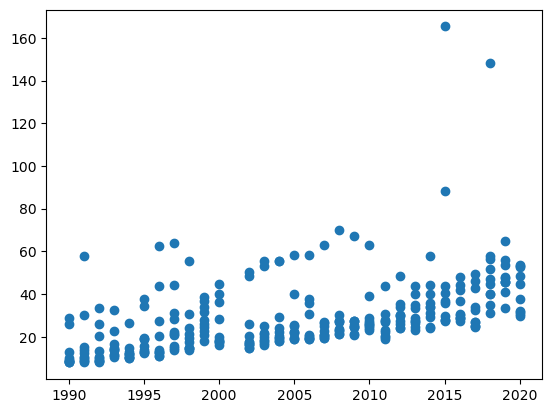

In [41]:
import matplotlib.pyplot as plt

plt.scatter(adjusted_df.Year, adjusted_df.Adjusted_Earnings)

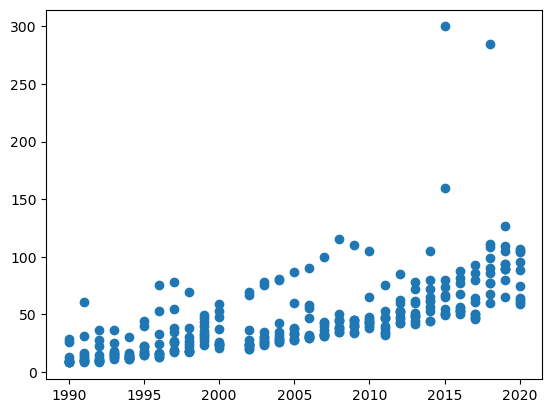

In [42]:
plt.scatter(adjusted_df.Year, adjusted_df["earnings ($ million)"])
plt.show()

In [43]:
adjusted_df.sort_values(by = "Adjusted_Earnings", ascending = False)

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),inflation,Adjusted_Earnings
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0,0.814021,165.378433
271,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0,0.921859,148.293953
242,Manny Pacquiao,Philippines,2,11,Boxing,2015,160.0,0.814021,88.201831
171,Tiger Woods,USA,1,1,Golf,2008,115.0,0.647828,69.788824
181,Tiger Woods,USA,1,1,Golf,2009,110.0,0.641970,66.992718
...,...,...,...,...,...,...,...,...,...
19,Sugar Ray Leonard,USA,10,6,Golf,1991,8.5,0.042350,8.154653
9,Evander Holyfield,USA,8,NaN,Boxing,1990,8.1,0.000000,8.100000
8,Arnold Palmer,USA,8,NaN,Golf,1990,8.1,0.000000,8.100000
7,Michael Jordan,USA,8,NaN,Basketball,1990,8.1,0.000000,8.100000


In [44]:
adjusted_df.loc[adjusted_df.Name == "Floyd Mayweather"].sort_values(by = "Year")

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),inflation,Adjusted_Earnings
192,Floyd Mayweather,USA,2,>10,Boxing,2010,65.0,0.668899,38.947844
211,Floyd Mayweather,USA,1,?,Boxing,2012,85.0,0.757208,48.372180
231,Floyd Mayweather,USA,1,14,Boxing,2014,105.0,0.811872,57.951116
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0,0.814021,165.378433
271,Floyd Mayweather,USA,1,>100,Boxing,2018,285.0,0.921859,148.293953


In [45]:
# Create pie charts to compare counts by nationality and agregated earnings by nationality
nationalities = adjusted_df.groupby("Nationality").Adjusted_Earnings.sum().sort_values(ascending = False).reset_index()
temp = adjusted_df.Nationality.value_counts().reset_index()
nationalities = pd.merge(nationalities.loc[:,["Nationality", "Adjusted_Earnings"]], temp.loc[:,["Nationality", "count"]], on = "Nationality")
nationalities

,Nationality,Adjusted_Earnings,count
0,USA,5696.520101,206
1,Germany,459.946363,13
2,Switzerland,424.943175,12
3,Portugal,421.360190,10
4,Argentina,380.440093,9
5,UK,276.516927,13
6,Brazil,250.382961,9
7,Philippines,137.729118,3
8,Italy,80.733127,4
9,Canada,79.552437,6


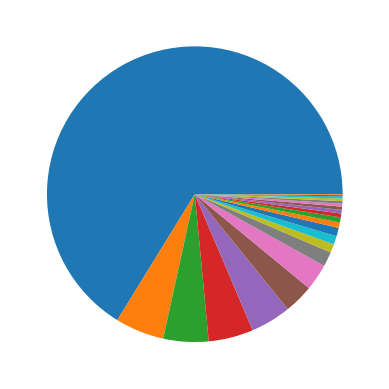

In [46]:
plt.pie(nationalities.Adjusted_Earnings)
plt.show()

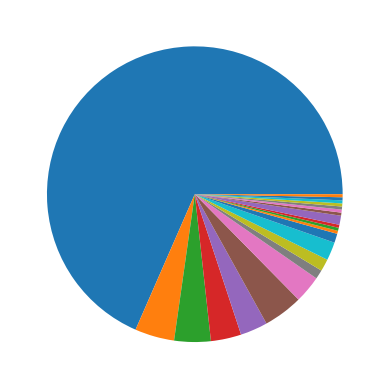

In [47]:
plt.pie(nationalities["count"])
plt.show()

In [48]:
# Create pie charts to compare counts by sport and agregated earnings by sport
sports = adjusted_df.groupby("Sport").Adjusted_Earnings.sum().sort_values(ascending = False).reset_index()
temp = adjusted_df.Sport.value_counts(normalize=True).reset_index()
sports = pd.merge(sports.loc[:,["Sport", "Adjusted_Earnings"]], temp.loc[:,["Sport", "proportion"]], on = "Sport")
sports

,Sport,Adjusted_Earnings,proportion
0,Basketball,2183.070245,0.272425
1,Boxing,1549.974067,0.152824
2,Golf,1359.916453,0.146179
3,Soccer,1212.393086,0.109635
4,F1 Motorsports,753.142121,0.102990
5,Tennis,590.798196,0.076412
6,American Football,549.764659,0.069767
7,Baseball,100.989719,0.019934
8,NASCAR,88.688463,0.016611
9,Motorcycle GP,80.733127,0.013289


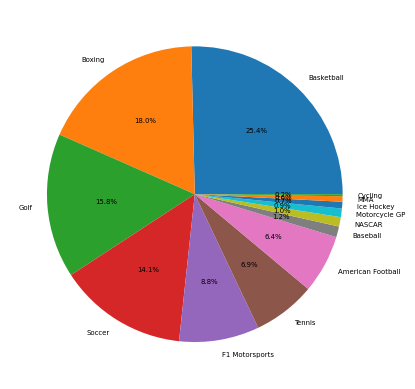

In [49]:
plt.pie(sports.Adjusted_Earnings, labels = sports.Sport, autopct='%1.1f%%', textprops={'fontsize': 5})
# plt.legend(sports.Sport)
plt.show()

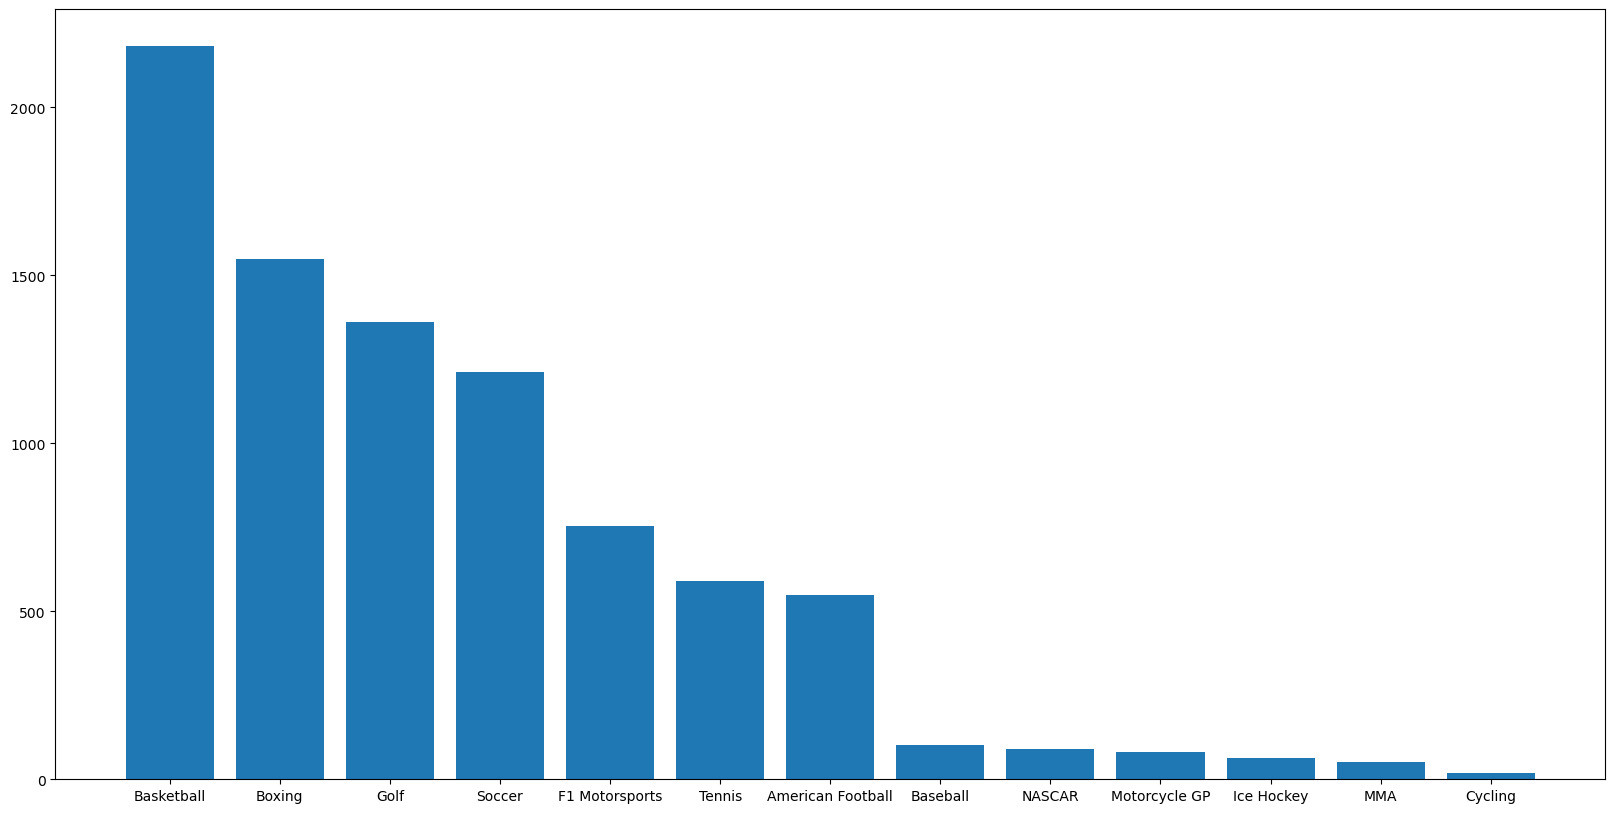

In [63]:
# Plot a graph for total adjusted earnings by sport. Stack it by US and non-US earnings.
usa_bysport = sports.loc[[sports.Sport == "F1 Motorsports"]]

plt.figure(figsize = (20,10))
plt.bar(sports.Sport, sports.Adjusted_Earnings)
plt.show()

In [55]:
# Group by athletes
athletes = adjusted_df.groupby("Name").Adjusted_Earnings.sum().sort_values(ascending = False).reset_index()
temp = adjusted_df.Name.value_counts().reset_index()
athletes = pd.merge(athletes.loc[:,["Name", "Adjusted_Earnings"]], temp.loc[:,["Name", "count"]], on = "Name")
athletes

,Name,Adjusted_Earnings,count
0,Tiger Woods,874.420517,19
1,Michael Jordan,568.121401,19
2,LeBron James,462.750580,13
3,Michael Schumacher,459.946363,13
4,Floyd Mayweather,458.943526,5
...,...,...,...
77,Dennis Rodman,10.745888,1
78,Michael Moorer,10.665986,1
79,"Donovan ""Razor"" Ruddock",9.785584,1
80,Greg Norman,8.500000,1


In [54]:
# locate athletes to graph their incomes
athlete_df.loc[athlete_df.Sport == "F1 Motorsports"]

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
S.NO,,,,,,,
4,Ayrton Senna,Brazil,4,NaN,F1 Motorsports,1990,10.0
5,Alain Prost,France,5,NaN,F1 Motorsports,1990,9.0
15,Ayrton Senna,Brazil,5,4,F1 Motorsports,1991,13.0
16,Alain Prost,France,6,5,F1 Motorsports,1991,11.0
19,Nigel Mansell,UK,9,12,F1 Motorsports,1991,9.0
23,Ayrton Senna,Brazil,3,5,F1 Motorsports,1992,22.0
24,Nigel Mansell,UK,4,9,F1 Motorsports,1992,14.5
33,Ayrton Senna,Brazil,3,3,F1 Motorsports,1993,18.5
34,Alain Prost,France,4,>40,F1 Motorsports,1993,16.0


In [53]:
adjusted_df.loc[adjusted_df.Name == "Dale Earnhardt Jr."].sort_values(by = "Year")

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),inflation,Adjusted_Earnings
190,Dale Earnhardt Jr.,USA,10,>10,NASCAR,2009,34.0,0.64197,20.70684


In [ ]:
athlete_df.Year.value_counts()

In [ ]:
athlete_df.loc[athlete_df.Name==2002]

In [ ]:
athlete_df.loc[athlete_df.Name=="Jeff Gordon"]